In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv(r"ny_taxi_data.csv")

In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N


In [13]:
# Predict passenge count...
data=df['passenger_count'].values

# data preprocessing

In [45]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data.reshape(-1,1)) # Convert rows to column

In [47]:
seq_length=5 # we can adjust the sequence

In [49]:
seq=[]
target=[]

In [51]:
for i in range(len(data)-seq_length):
    seq.append(data[i:i+seq_length])
    target.append(data[i+seq_length])

seq=np.array(seq)
target=np.array(target)

In [53]:
seq

array([[[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        [0. ],
        [1. ]],

       [[0. ],
        [0. ],
        [0. ],
        [1. ],
        [0.6]],

       ...,

       [[0.4],
        [0. ],
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ]]])

In [55]:
X_train,X_test,y_train,y_test= train_test_split(seq,target, test_size=0.2, random_state=42)

In [57]:
X_train.shape, y_train.shape

((12876, 5, 1), (12876, 1))

# Build and Train RNN model

In [66]:
model_rnn=keras.Sequential(name="RNN")

In [68]:
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1],1)))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Varsha Arun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model_rnn.summary()

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model_rnn.fit(X_train,y_train, epochs=100, batch_size=32) #Verbose-0-Will not see the output,1-See the output

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0713
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0707
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0718
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0706
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0702
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0695
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0690
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0722
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0700
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0718
Epoch 11/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0709
Epoch 12/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0719
Epoch 13/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0706
Epoch 14/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0707
Epoch 15/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2

# LSTM Model

In [82]:
# Lstm Model:

model_lstm=keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100,activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss="mean_squared_error")

C:\Users\Varsha Arun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model_lstm.fit(X_train,y_train,epochs=50,batch_size=32, verbose=0)

# GRU

In [88]:

model_gru=keras.Sequential(name="GRU")
model_gru.add(keras.layers.LSTM(100,activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss="mean_squared_error")

C:\Users\Varsha Arun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model_gru.fit(X_train,y_train,epochs=50,batch_size=32, verbose=0)

In [101]:
# Evaluate Model:
from sklearn.metrics import mean_squared_error
def evaluate_model(model,X_test, y_test):
    X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
    y_pred=model.predict(X_test_reshaped)
    y_pred=scaler.inverse_transform(y_pred).flatten()
    y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
    mse=mean_squared_error(y_test,y_pred)
    return mse

In [105]:
mse_rnn=evaluate_model(model_rnn,X_test,y_test)
mse_lstm=evaluate_model(model_lstm,X_test,y_test)
mse_gru=evaluate_model(model_gru,X_test,y_test)

print("Rnn: ", mse_rnn)
print("Lstm: ", mse_lstm)
print("Gru: ", mse_gru)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Rnn:  0.06814381993426255
Lstm:  0.06692564133201938
Gru:  0.06692207307133548


# So GRU is best- since mse is less

# Visualize

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


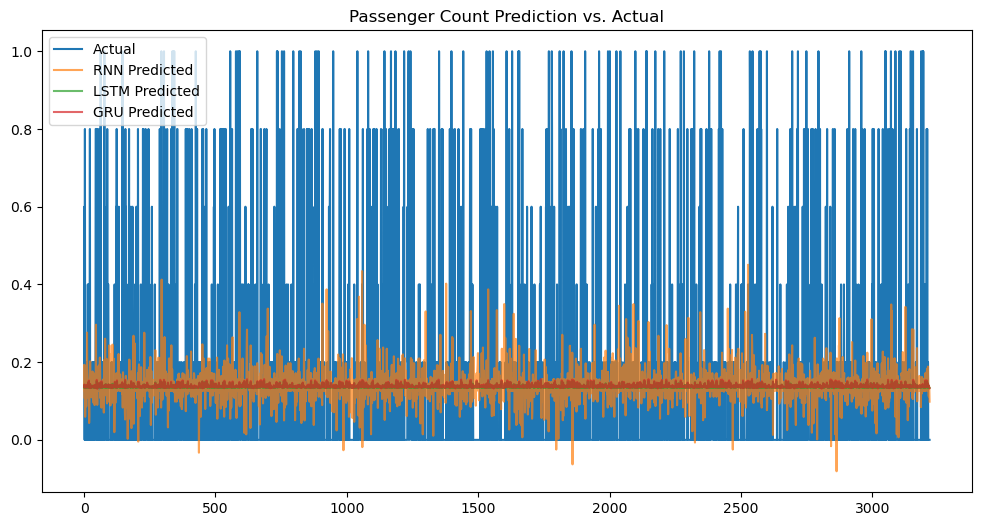

In [110]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()